In [1]:
from torchvision import datasets

In [3]:
data_path = '/home/youhyeok/Documents/data/'

cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

100.0%


Extracting /home/youhyeok/Documents/data/cifar-10-python.tar.gz to /home/youhyeok/Documents/data/
Files already downloaded and verified


In [4]:
len(cifar10)

50000

In [6]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [7]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

In [8]:
from matplotlib import pyplot as plt

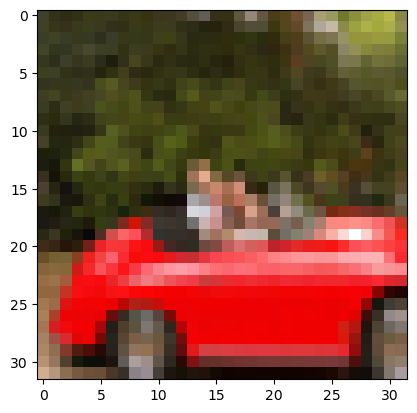

In [9]:
plt.imshow(img)
plt.show()

In [10]:
from torchvision import transforms

In [11]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [12]:
to_tensor = transforms.ToTensor()

In [13]:
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [14]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [15]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [16]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [17]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

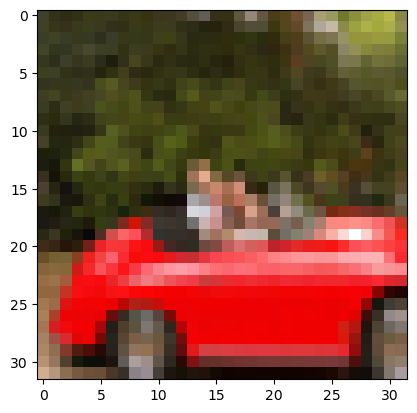

In [18]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [20]:
import torch

In [29]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

In [30]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [31]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [32]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [34]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [35]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                  transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                         (0.2470, 0.2435, 0.2616))
                                  ]))

In [ ]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()